   R2 Score       MAE      RMSE
0   0.93793  0.022857  0.033594


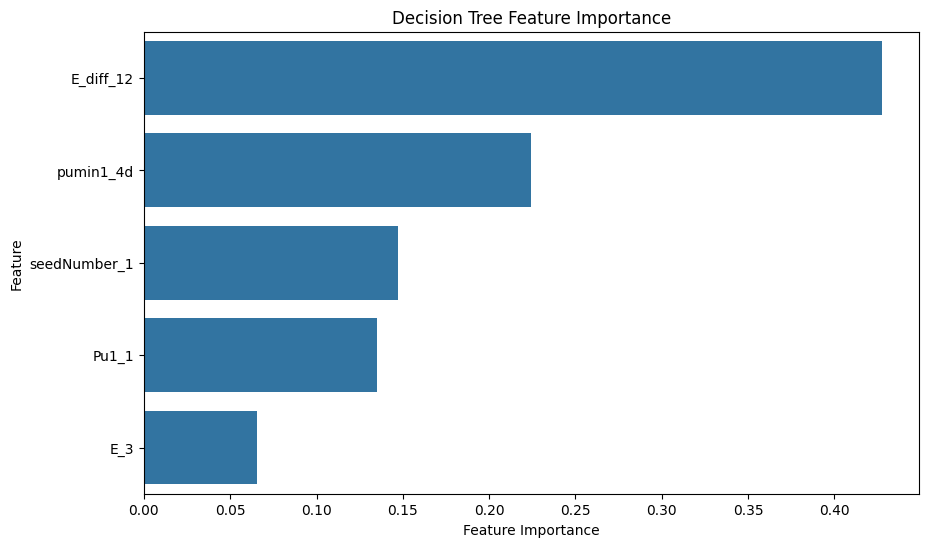

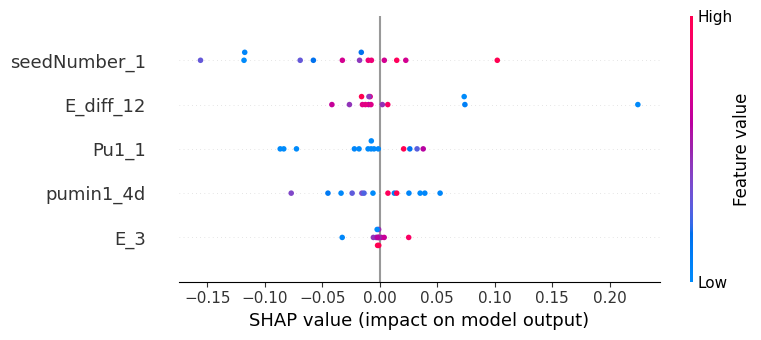

<Figure size 640x480 with 0 Axes>

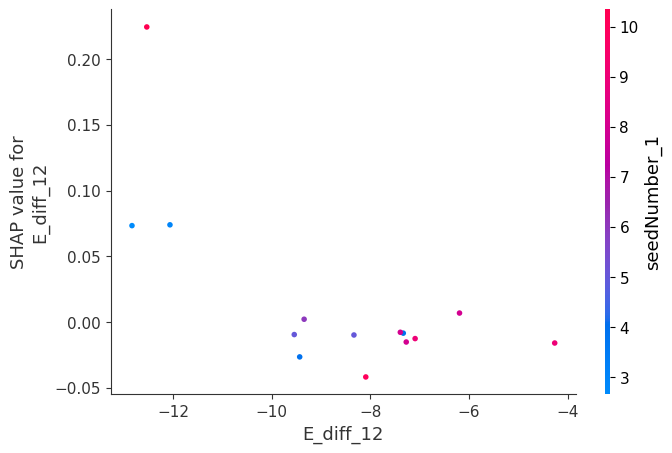

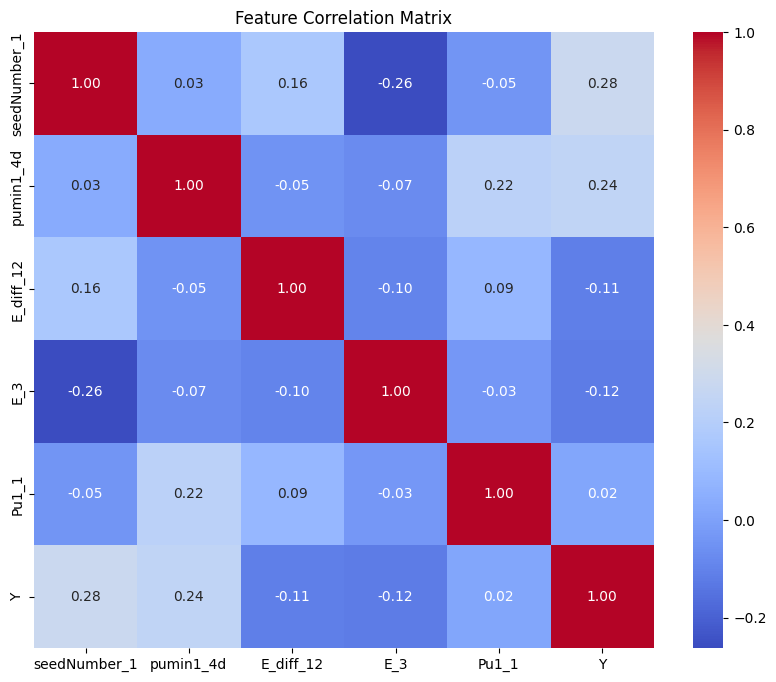

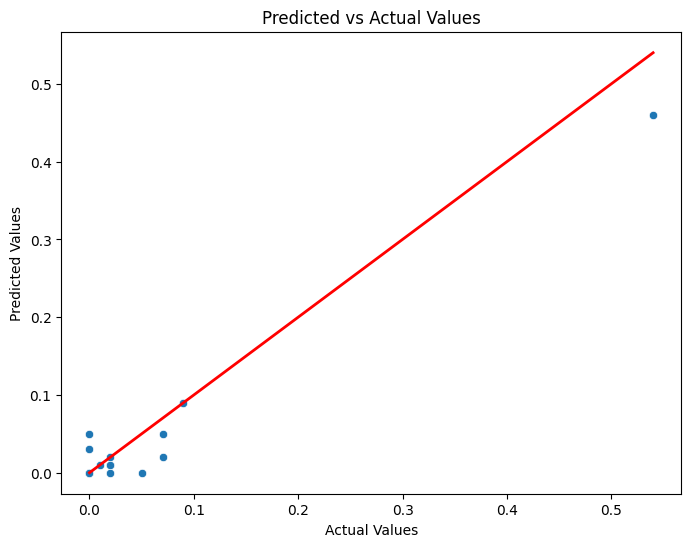

In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("mergedData_annotated.num.csv")

# Define features and target
selected_features = ["seedNumber_1", "pumin1_4d", "E_diff_12", "E_3", "Pu1_1"]
y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Train Decision Tree model
best_model = DecisionTreeRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

results = pd.DataFrame({"R2 Score": [r2], "MAE": [mae], "RMSE": [rmse]})
results.to_csv("decision_tree_results.csv", index=False)
print(results)

# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": selected_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df.to_csv("feature_importance.csv", index=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("shap_summary.png", bbox_inches='tight')
plt.show()

# SHAP Dependence Plot for Top Feature
top_feature = feature_importance_df.iloc[0, 0]
plt.figure()
shap.dependence_plot(top_feature, shap_values.values, X_test, show=False)
plt.savefig(f"shap_dependence_{top_feature}.png", bbox_inches='tight')
plt.show()

# Correlation Matrix
correlation_matrix = data[selected_features + ['Y']].corr()
correlation_matrix.to_csv("correlation_matrix.csv")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

# Predictive vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.savefig("predicted_vs_actual.png")
plt.show()


   R2 Score    MAE     RMSE
0   0.93518  0.025  0.03433


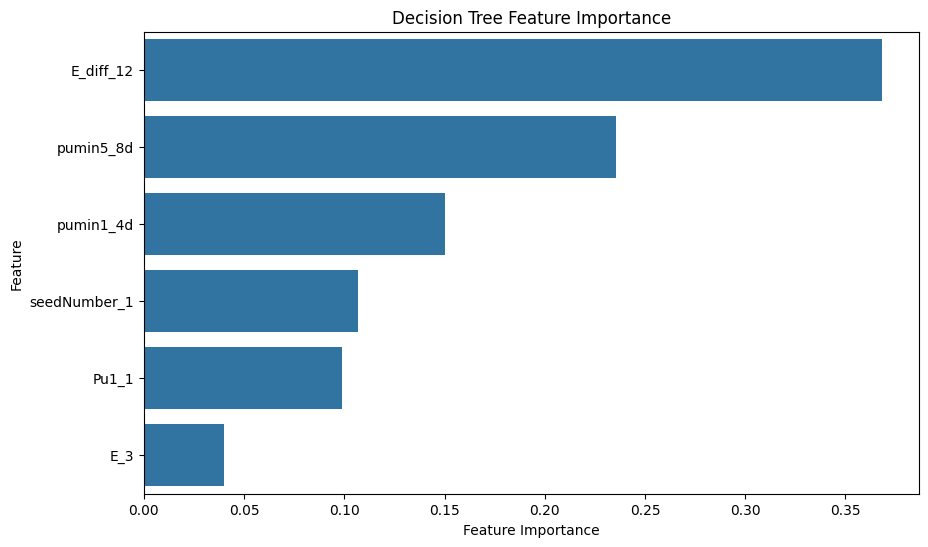

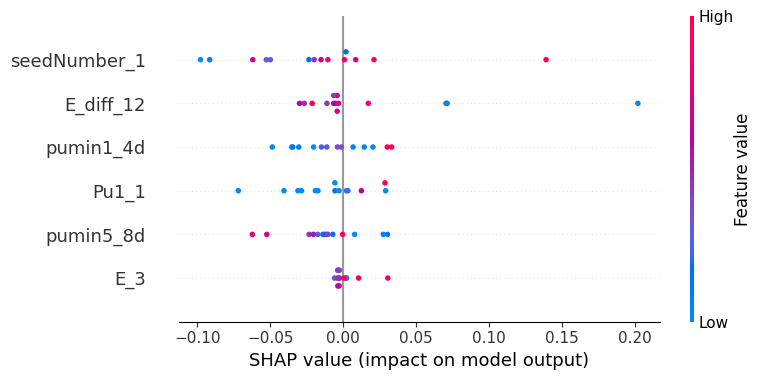

<Figure size 640x480 with 0 Axes>

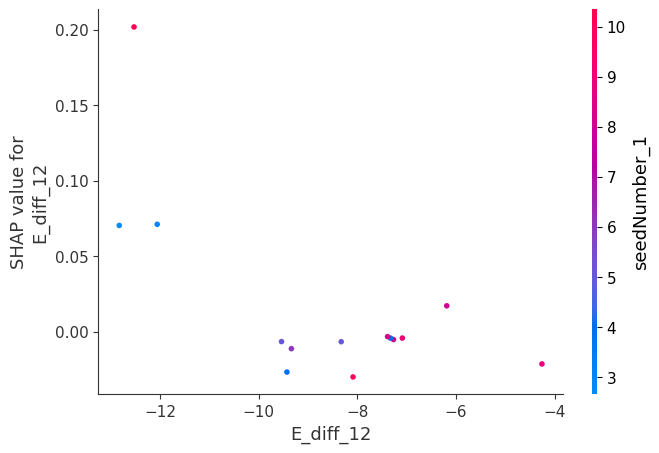

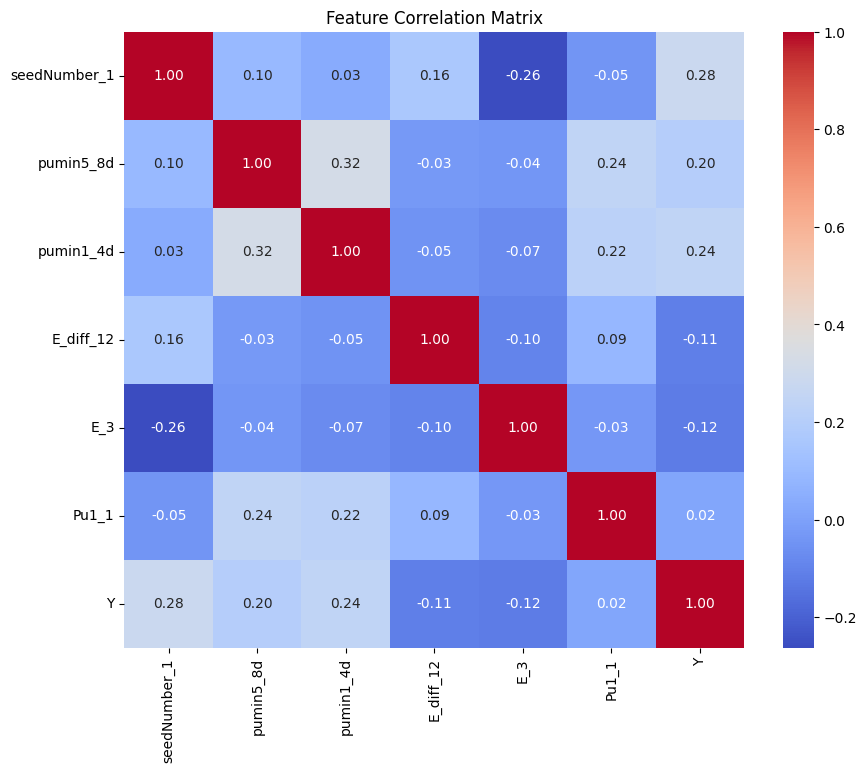

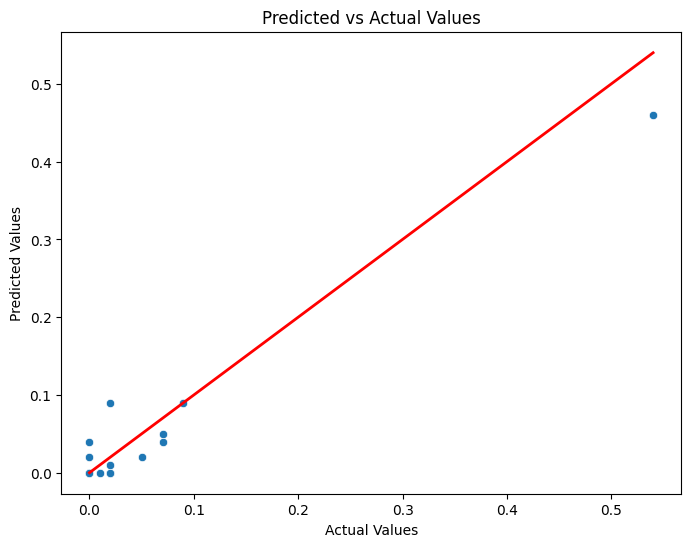

In [4]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("mergedData_annotated.num.csv")

# Define features and target 
selected_features = ["seedNumber_1", "pumin5_8d", "pumin1_4d", "E_diff_12","E_3", "Pu1_1"]
y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Train Decision Tree model
best_model = DecisionTreeRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

results = pd.DataFrame({"R2 Score": [r2], "MAE": [mae], "RMSE": [rmse]})
results.to_csv("decision_tree_results.csv", index=False)
print(results)

# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": selected_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df.to_csv("feature_importance.csv", index=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("shap_summary.png", bbox_inches='tight')
plt.show()

# SHAP Dependence Plot for Top Feature
top_feature = feature_importance_df.iloc[0, 0]
plt.figure()
shap.dependence_plot(top_feature, shap_values.values, X_test, show=False)
plt.savefig(f"shap_dependence_{top_feature}.png", bbox_inches='tight')
plt.show()

# Correlation Matrix
correlation_matrix = data[selected_features + ['Y']].corr()
correlation_matrix.to_csv("correlation_matrix.csv")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

# Predictive vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.savefig("predicted_vs_actual.png")
plt.show()


   R2 Score       MAE      RMSE
0   0.94068  0.022143  0.032842


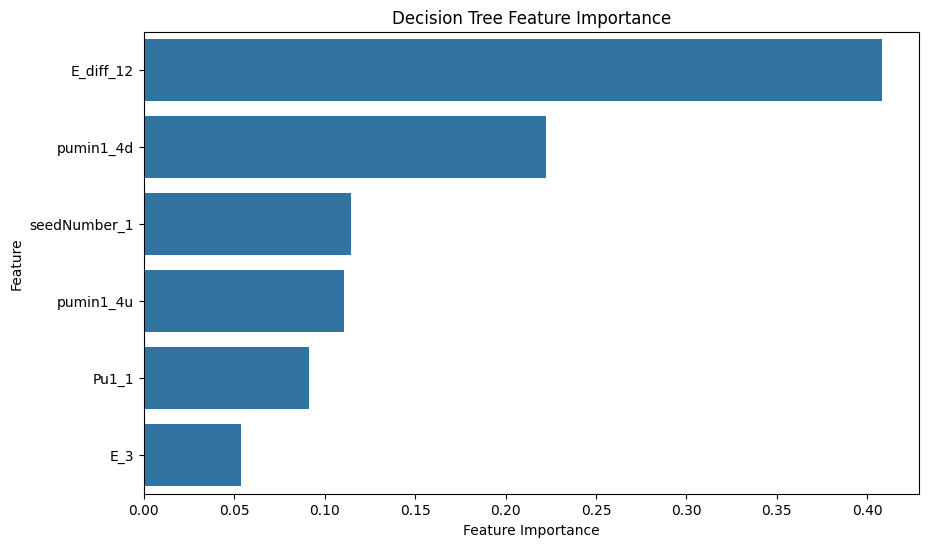

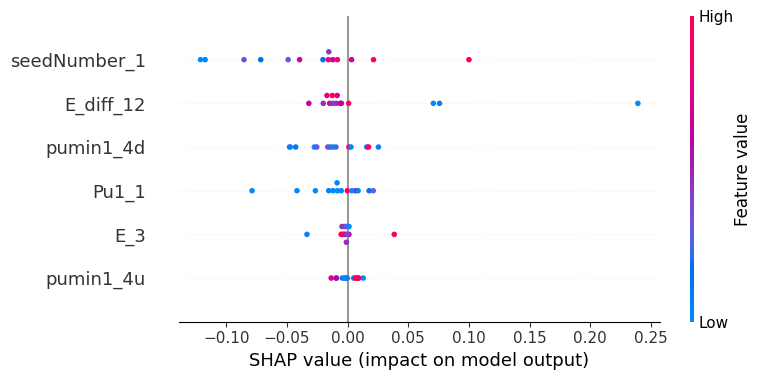

<Figure size 640x480 with 0 Axes>

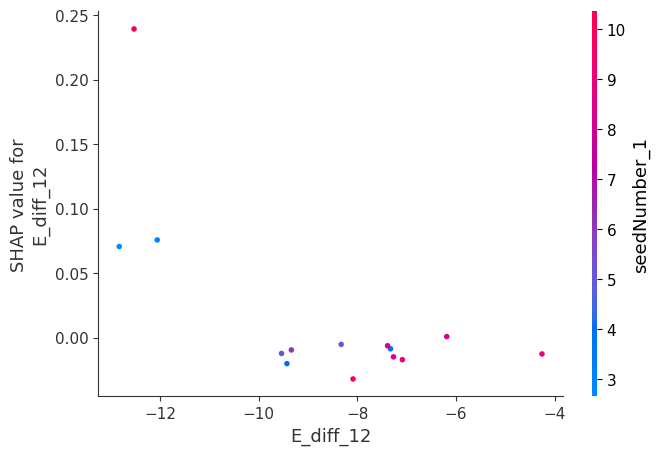

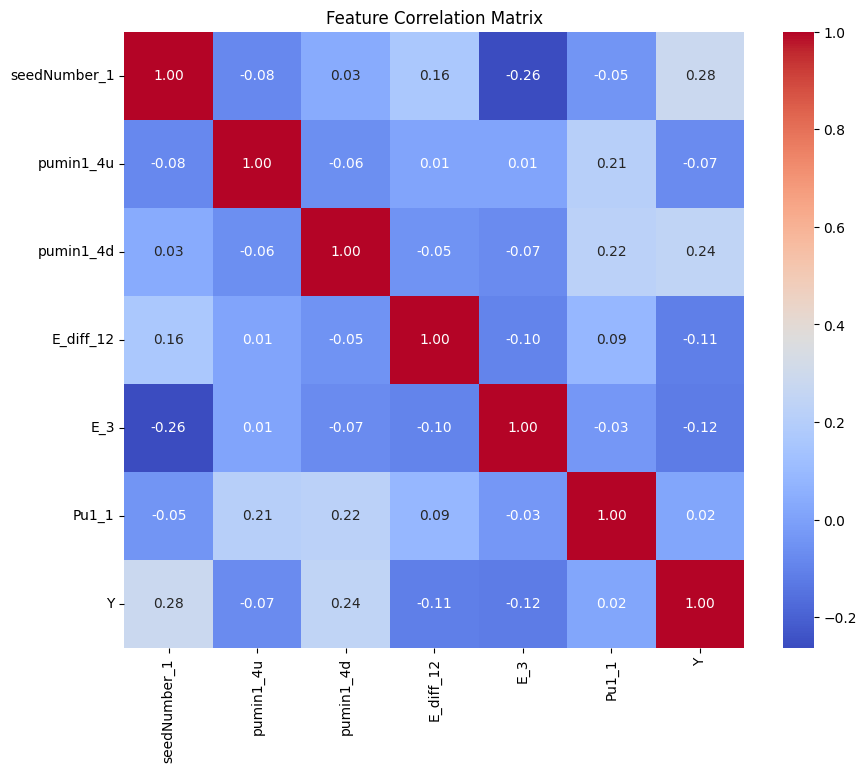

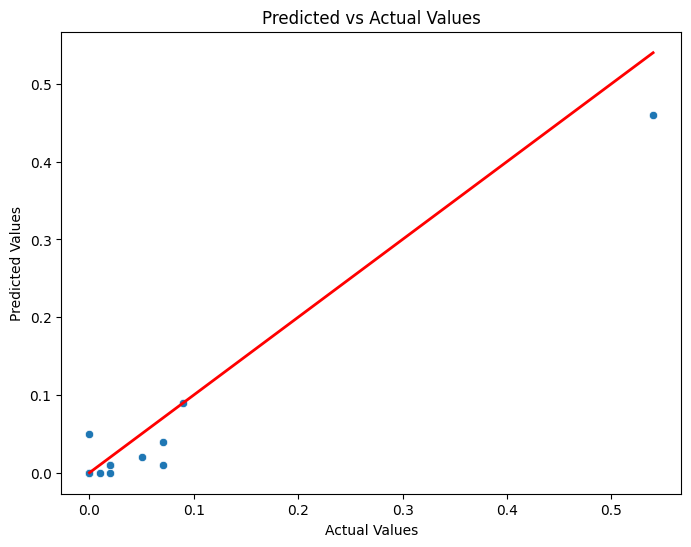

In [7]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("mergedData_annotated.num.csv")

# Define features and target 
selected_features = ["seedNumber_1","pumin1_4u","pumin1_4d","E_diff_12","E_3", "Pu1_1"]
y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Train Decision Tree model
best_model = DecisionTreeRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

results = pd.DataFrame({"R2 Score": [r2], "MAE": [mae], "RMSE": [rmse]})
results.to_csv("decision_tree_results.csv", index=False)
print(results)

# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": selected_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df.to_csv("feature_importance.csv", index=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("shap_summary.png", bbox_inches='tight')
plt.show()

# SHAP Dependence Plot for Top Feature
top_feature = feature_importance_df.iloc[0, 0]
plt.figure()
shap.dependence_plot(top_feature, shap_values.values, X_test, show=False)
plt.savefig(f"shap_dependence_{top_feature}.png", bbox_inches='tight')
plt.show()

# Correlation Matrix
correlation_matrix = data[selected_features + ['Y']].corr()
correlation_matrix.to_csv("correlation_matrix.csv")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

# Predictive vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.savefig("predicted_vs_actual.png")
plt.show()


   R2 Score       MAE    RMSE
0  0.937537  0.023571  0.0337


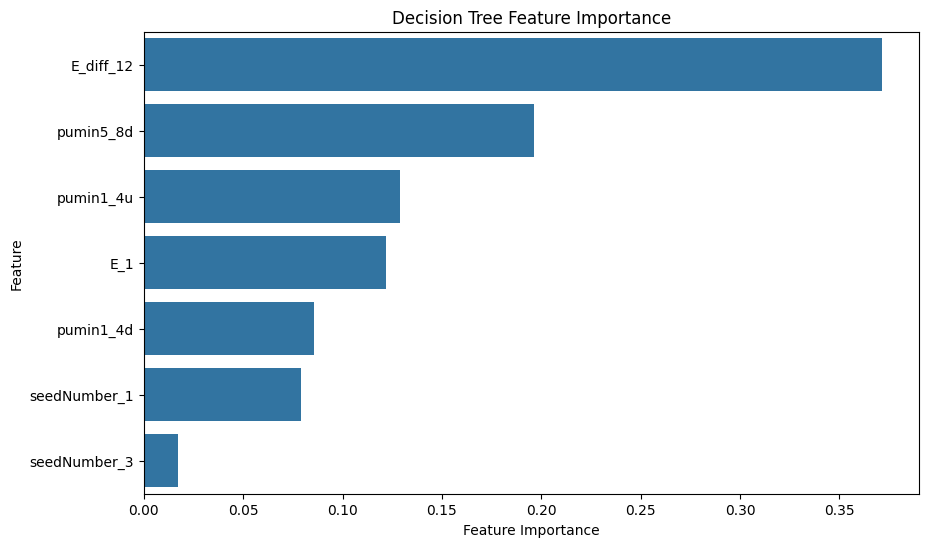

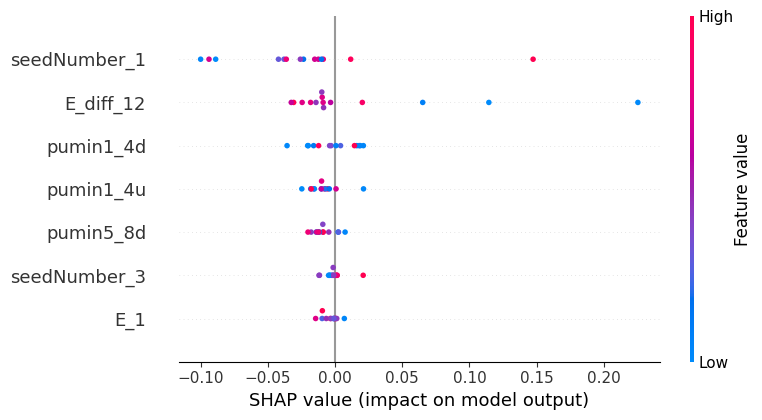

<Figure size 640x480 with 0 Axes>

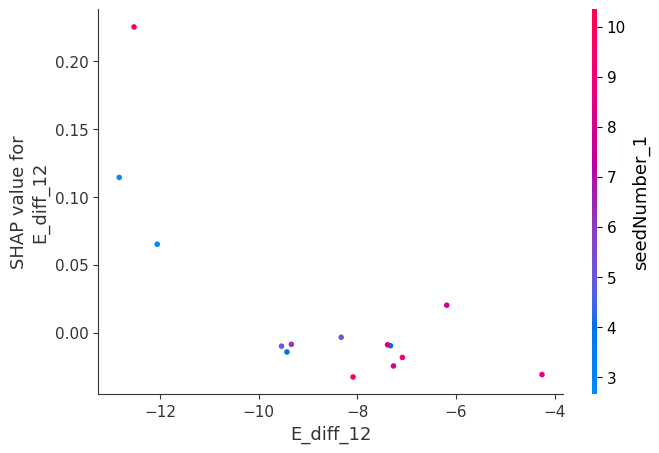

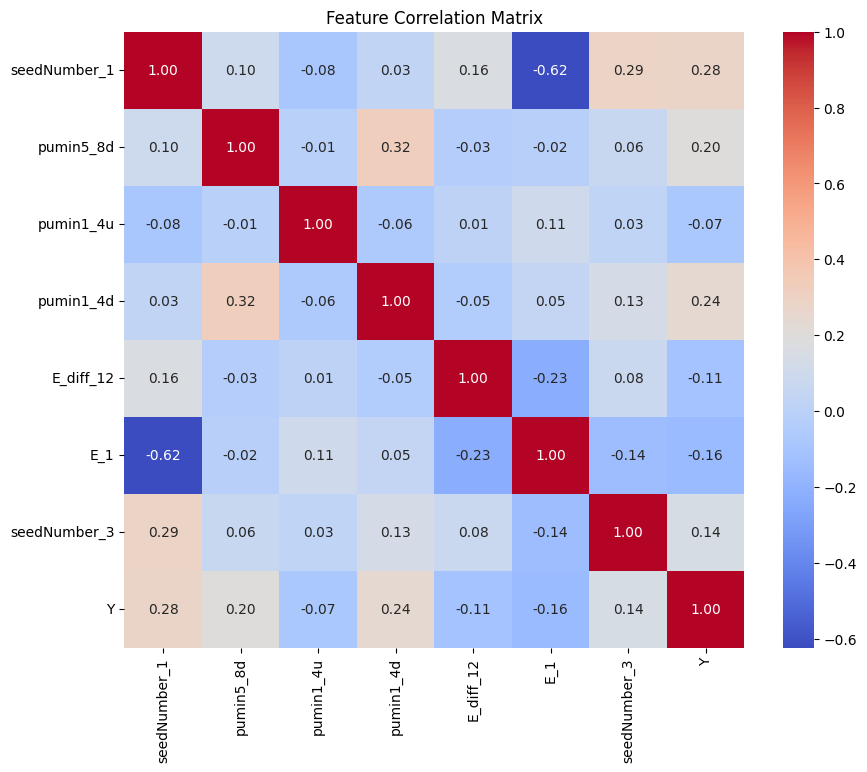

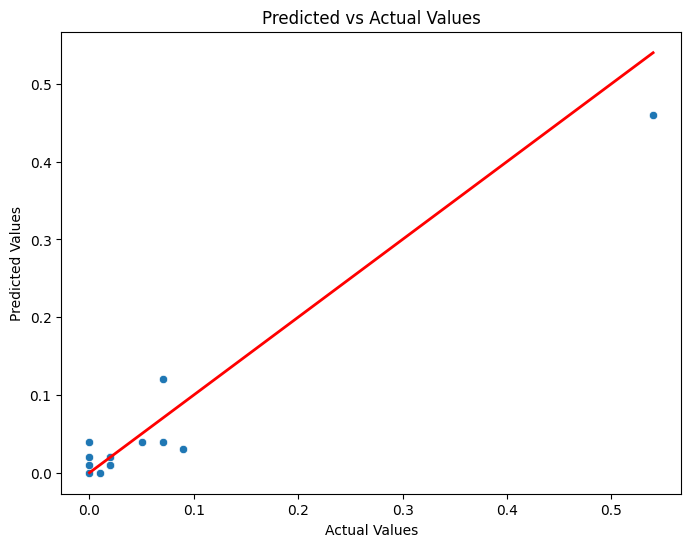

In [8]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("mergedData_annotated.num.csv")
# Define features and target 
selected_features = ["seedNumber_1","pumin5_8d","pumin1_4u","pumin1_4d","E_diff_12","E_1","seedNumber_3"]
y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Train Decision Tree model
best_model = DecisionTreeRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

results = pd.DataFrame({"R2 Score": [r2], "MAE": [mae], "RMSE": [rmse]})
results.to_csv("decision_tree_results.csv", index=False)
print(results)

# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": selected_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df.to_csv("feature_importance.csv", index=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("shap_summary.png", bbox_inches='tight')
plt.show()

# SHAP Dependence Plot for Top Feature
top_feature = feature_importance_df.iloc[0, 0]
plt.figure()
shap.dependence_plot(top_feature, shap_values.values, X_test, show=False)
plt.savefig(f"shap_dependence_{top_feature}.png", bbox_inches='tight')
plt.show()

# Correlation Matrix
correlation_matrix = data[selected_features + ['Y']].corr()
correlation_matrix.to_csv("correlation_matrix.csv")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

# Predictive vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.savefig("predicted_vs_actual.png")
plt.show()
